# Decision Tree
A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.


A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.


We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-

1. At the beginning, the whole training set is considered as the root.
2. Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
3. Records are distributed recursively on the basis of attribute values.
4. Order to placing attributes as root or internal node of the tree is done by using some statistical approach.
---

By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called **Entropy**.

## **Entropy**

Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. **Information gain** is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

Entropy is represented by the following formula:-

![Entropy](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)



Here, **c** is the number of classes and **pi** is the probability associated with the ith class.

## Gini index <a class="anchor" id="5.2"></a>



Another attribute selection measure that **CART (Categorical and Regression Trees)** uses is the **Gini index**. It uses the Gini method to create split points.


Gini index can be represented with the following diagram:-

## **Gini index**

![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)


Here, again **c** is the number of classes and **pi** is the probability associated with the ith class.

---

## **Over Fitting**

Overfitting is a practical problem while building a Decision-Tree model. The problem of overfitting is considered when the algorithm continues to go deeper and deeper to reduce the training-set error but results with an increased test-set error. So, accuracy of prediction for our model goes down. It generally happens when we build many branches due to outliers and irregularities in data.


Two approaches which can be used to avoid overfitting are as follows:-

- Pre-Pruning

- Post-Pruning


## **Pre-Pruning**

In pre-pruning, we stop the tree construction a bit early. We prefer not to split a node if its goodness measure is below a threshold value. But it is difficult to choose an appropriate stopping point.


## **Post-Pruning**

In post-pruning, we go deeper and deeper in the tree to build a complete tree. If the tree shows the overfitting problem then pruning is done as a post-pruning step. We use the cross-validation data to check the effect of our pruning. Using cross-validation data, we test whether expanding a node will result in improve or not. If it shows an improvement, then we can continue by expanding that node. But if it shows a reduction in accuracy then it should not be expanded. So, the node should be converted to a leaf node.

---
Reference: [Decision Trees](https://www.mastersindatascience.org/learning/machine-learning-algorithms/decision-tree/)

Let's take an example to explain Decision Trees!

# Step 1 : Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Step 2 : Data Read

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['adult.csv']))
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#Step 3 : Data Preprocessing



Goals for preprocessing:
*   Check for '?'
*   Check for '0'



In [ ]:
data = df.replace('?', np.nan)

In [ ]:
# Checking null values with '?'
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [ ]:
nan_cols = ['workclass', 'occupation', 'native.country']

In [ ]:
for col in nan_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [ ]:
data = data.replace(0, np.nan)

In [ ]:
# Checking null values with 0
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass           0.0 %
fnlwgt              0.0 %
education           0.0 %
education.num       0.0 %
marital.status      0.0 %
occupation          0.0 %
relationship        0.0 %
race                0.0 %
sex                 0.0 %
capital.gain      91.67 %
capital.loss      95.33 %
hours.per.week      0.0 %
native.country      0.0 %
income              0.0 %
dtype: object

In [ ]:
zero_nan_cols = ['capital.gain','capital.loss']

In [ ]:
for col in zero_nan_cols:
    data[col].fillna(data[col].mean(), inplace=True)



In [ ]:
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,12938.541298,4356.0,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.0,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,12938.541298,4356.0,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.0,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.0,40,United-States,<=50K


Perfect! We have succesfully Preprocessed the Data.

In [ ]:
# Replacing The income to a Classification Outcome 0 and 1.

data = data.replace('<=50K', 0)
data = data.replace('>50K', 1)
data.head(30)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,12938.541298,4356.0,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.0,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,12938.541298,4356.0,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.0,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.0,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,12938.541298,3770.0,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,12938.541298,3770.0,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,12938.541298,3683.0,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,12938.541298,3683.0,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,12938.541298,3004.0,60,United-States,1


###*Equal-Width Discretization*

Lets Divide the Continuous Attributes into Intervals for better preprocessed Data, and then followed by Label Encoding.


*   I have stated my intuitions for the Width dicretization of few feature columns.
*   Try to figure out for other feature columns, or you can reach out to me @f20200980@hyderabad.bits-pilani.ac.in for queries.



In [ ]:
# Define the continuous attributes that need to be discretized
continuous_attributes = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Discretize the continuous attributes using appropriate techniques
num_bins = 10  # Define the number of bins for discretization

for attribute in continuous_attributes:
    # Perform discretization using the cut() function
    if(attribute == 'age'):

      # Intuition: Since below 18 age group people have generally no income, lets take the interval 1 from [0,18] and similarlly, bachelor, senior groups etc.
      data[attribute+'_discrete']=pd.cut(data[attribute], [0, 18, 22, 45, 65, 100], labels=["Young", "Junior", "middle-aged","senior","old"], right= True, include_lowest=True)


    elif(attribute == 'capital.gain'):

      #Intuition: Since there may also exist a Rickshaw Driver and also Ambani in an income dataset, Lets discretize the data to
      #           high, low etc instead of jusyt replacing with the mean of the feature coloumn.

      data[attribute+'_discrete']=pd.cut(data[attribute], [0, 1, 7298, 99999], labels=["None", "Low", "High"], right= True, include_lowest=True)

    elif(attribute == 'capital.loss'):

      data[attribute+'_discrete']=pd.cut(data[attribute], [0, 1, 1887, 4500], labels=["None", "Low", "High"], right= True, include_lowest=True)

    elif(attribute == 'hours.per.week'):

      data[attribute+'_discrete']=pd.cut(data[attribute], [0,25,40,60,100], labels=["part-time", "full-time", "Over-time","Too-much"], right= True, include_lowest=True)

    else: data[attribute+'_discrete'] = pd.cut(data[attribute], num_bins)

# Print the updated Data with discretized attributes
data.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,capital.loss,hours.per.week,native.country,income,age_discrete,fnlwgt_discrete,education.num_discrete,capital.gain_discrete,capital.loss_discrete,hours.per.week_discrete
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,4356.0,40,United-States,0,old,"(10812.58, 159527.0]","(8.5, 10.0]",High,High,full-time
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,4356.0,18,United-States,0,old,"(10812.58, 159527.0]","(8.5, 10.0]",High,High,part-time
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,4356.0,40,United-States,0,old,"(159527.0, 306769.0]","(8.5, 10.0]",High,High,full-time
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,3900.0,40,United-States,0,senior,"(10812.58, 159527.0]","(2.5, 4.0]",High,High,full-time
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,3900.0,40,United-States,0,middle-aged,"(159527.0, 306769.0]","(8.5, 10.0]",High,High,full-time


###Discretized Data

In [ ]:
discrete_data = data.drop(['age'],axis=1)
discrete_data = discrete_data.drop(['fnlwgt'],axis=1)
discrete_data = discrete_data.drop(['education.num'],axis=1)
discrete_data = discrete_data.drop(['capital.gain'],axis=1)
discrete_data = discrete_data.drop(['capital.loss'],axis=1)
discrete_data = discrete_data.drop(['hours.per.week'],axis=1)
discrete_data.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age_discrete,fnlwgt_discrete,education.num_discrete,capital.gain_discrete,capital.loss_discrete,hours.per.week_discrete
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,0,old,"(10812.58, 159527.0]","(8.5, 10.0]",High,High,full-time
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,0,old,"(10812.58, 159527.0]","(8.5, 10.0]",High,High,part-time
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,0,old,"(159527.0, 306769.0]","(8.5, 10.0]",High,High,full-time
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,0,senior,"(10812.58, 159527.0]","(2.5, 4.0]",High,High,full-time
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,0,middle-aged,"(159527.0, 306769.0]","(8.5, 10.0]",High,High,full-time


###Label Encoding

Our Next **Goal** is to Now Convert categorical Data into Label Encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder

labels=['age_discrete', 'workclass', 'fnlwgt_discrete', 'education', 'education.num_discrete',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain_discrete', 'capital.loss_discrete', 'hours.per.week_discrete', 'native.country']
for label in labels:
  discrete_data[label+'_n']= LabelEncoder().fit_transform(discrete_data[label])
discrete_data.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age_discrete,...,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,0,old,...,5,6,9,1,4,0,0,0,2,38
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,0,old,...,5,6,3,1,4,0,0,0,3,38
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,0,old,...,5,6,9,4,2,0,0,0,2,38
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,0,senior,...,1,0,6,4,4,0,0,0,2,38
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,0,middle-aged,...,5,5,9,3,4,0,0,0,2,38


In [ ]:
discrete_data=discrete_data.drop(['age_discrete', 'workclass', 'fnlwgt_discrete', 'education', 'education.num_discrete',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain_discrete', 'capital.loss_discrete', 'hours.per.week_discrete', 'native.country'], axis='columns')

In [ ]:
discrete_data = discrete_data.rename(columns={'income':'income_n'})

In [ ]:
discrete_data.head()

,income_n,age_discrete_n,workclass_n,fnlwgt_discrete_n,education_n,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
0,0,3,3,0,11,5,6,9,1,4,0,0,0,2,38
1,0,3,3,0,11,5,6,3,1,4,0,0,0,3,38
2,0,3,3,1,15,5,6,9,4,2,0,0,0,2,38
3,0,4,3,0,5,1,0,6,4,4,0,0,0,2,38
4,0,2,3,1,15,5,5,9,3,4,0,0,0,2,38


Voila! Our dataset is ready to Go for Analysis.

# Step 4 : Data Analysis

In [ ]:
discrete_data.columns

Index(['income_n', 'age_discrete_n', 'workclass_n', 'fnlwgt_discrete_n',
       'education_n', 'education.num_discrete_n', 'marital.status_n',
       'occupation_n', 'relationship_n', 'race_n', 'sex_n',
       'capital.gain_discrete_n', 'capital.loss_discrete_n',
       'hours.per.week_discrete_n', 'native.country_n'],
      dtype='object')

## Data Plots


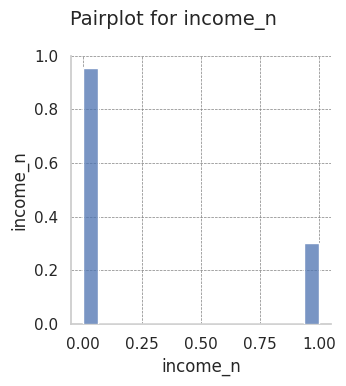

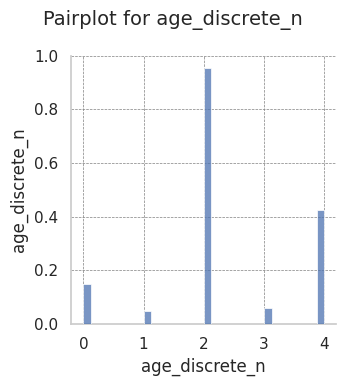

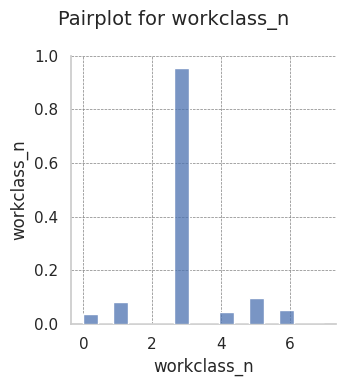

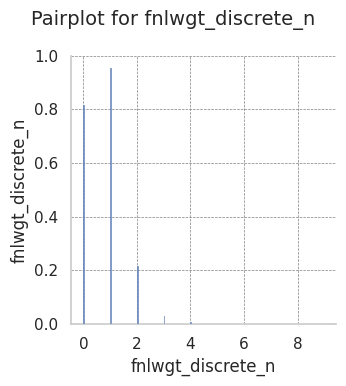

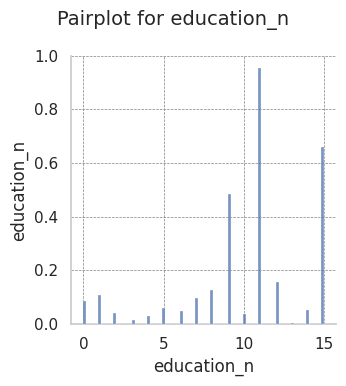

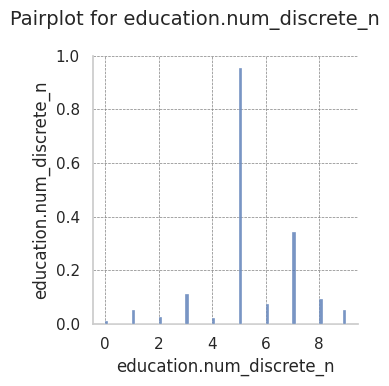

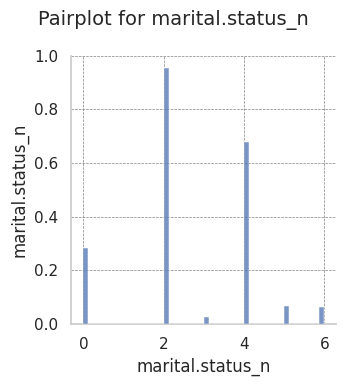

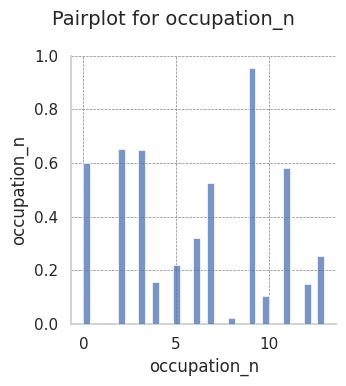

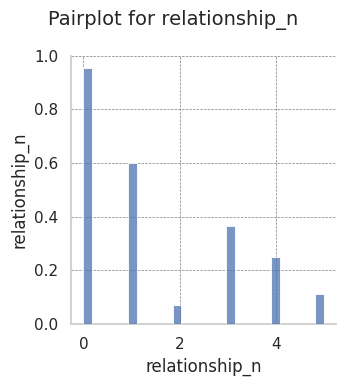

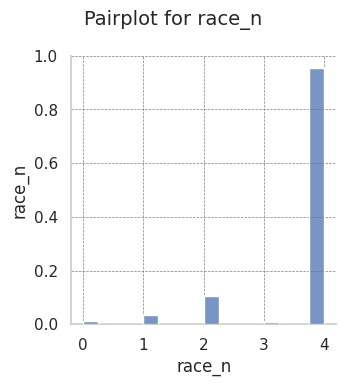

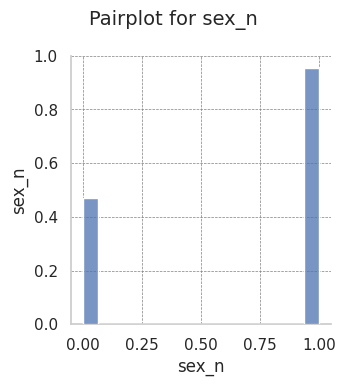

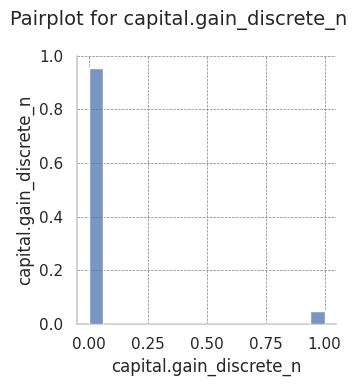

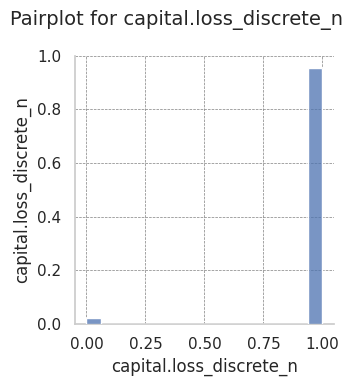

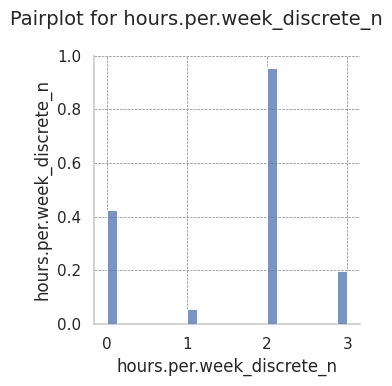

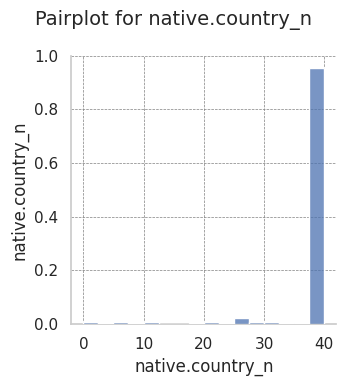

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme for Seaborn
sns.set_theme(style="whitegrid")

# Use a custom color palette
palette = sns.color_palette("coolwarm", as_cmap=True)

for col in discrete_data.columns:
    g = sns.pairplot(discrete_data, vars=[col], palette=palette, height=3.5) # Reduced height for smaller plots
    g.fig.suptitle(f'Pairplot for {col}', size=14, y=1.08) # Adjusted font size and title position

    # Enhance the grid aesthetics
    for ax in g.axes.flat:
        ax.grid(color='gray', linestyle='--', linewidth=0.5)

    plt.show()


## Correlation Matrix

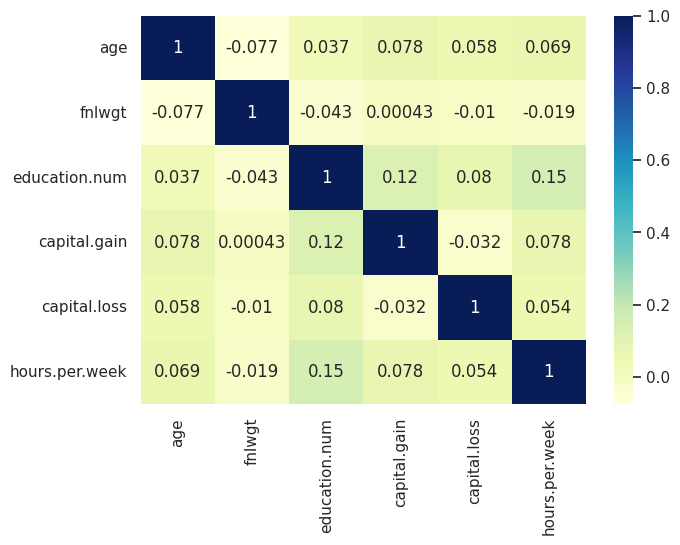

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()






# Step 5 : Train-Test Split



In [ ]:
y = discrete_data['income_n'] ## Outcome varible 'y' is the Class feature.
X = discrete_data.drop('income_n',axis=1) ## 'x' stores the remaining features.


## Train Test Split

In [ ]:

dt_x_train, dt_x_test, dt_y_train, dt_y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [ ]:
dt_x_train.head()

,age_discrete_n,workclass_n,fnlwgt_discrete_n,education_n,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
29313,2,3,0,15,5,2,11,0,4,1,0,1,0,38
16021,0,3,1,15,5,4,6,4,4,1,0,1,2,38
905,2,3,0,15,5,0,3,1,4,1,0,1,0,38
31251,4,3,0,9,7,2,11,0,4,1,0,1,2,38
3368,2,3,0,15,5,4,13,1,4,1,1,1,2,38


In [ ]:
dt_y_train.head()

29313    1
16021    0
905      0
31251    1
3368     0
Name: income_n, dtype: int64

# Step 6 : Model Fitting & Evaluation



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

dt1_x_ax=[]
dt1_y_ax_test=[]
dt1_y_ax_train=[]
n=dt_x_train.shape[1]
for i in range(n, 1, -1):
    classifier1 = DecisionTreeClassifier(max_depth=i)
    classifier1.fit(dt_x_train, dt_y_train)
    dt1_x_ax.append(i)
    dt1_y_ax_test.append(classifier1.score(dt_x_test, dt_y_test))
    dt1_y_ax_train.append(classifier1.score(dt_x_train, dt_y_train))


### How do we the find the Optimal Depth for the Tree?

Since, we do not know the optimal depth of the Tree, we shall plot a graph `depth of nodes` V/s `Accuracy`. The optimal depth for a decision tree is typically chosen based on where the testing accuracy starts to plateau or decline while the training accuracy continues to increase. This point helps in preventing overfitting.



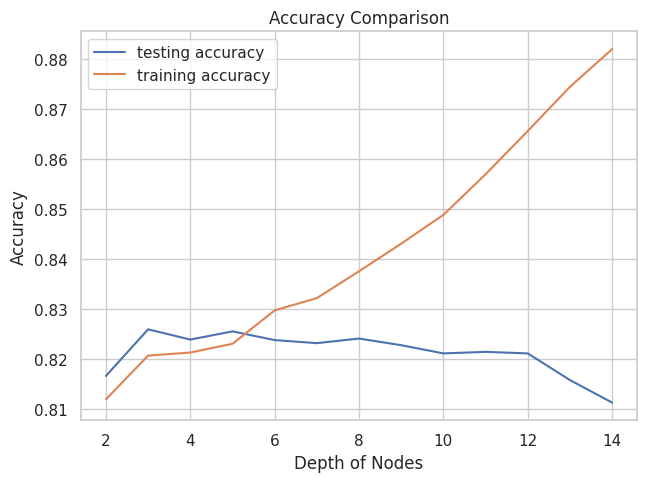

In [ ]:
plt.plot(dt1_x_ax,dt1_y_ax_test,label="testing accuracy")
plt.plot(dt1_x_ax,dt1_y_ax_train,label="training accuracy")

# Add labels for the x-axis and y-axis
plt.xlabel("Depth of Nodes")
plt.ylabel("Accuracy")

# Add a title to the plot
plt.title("Accuracy Comparison")

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()



From the provided graph, it appears that the testing accuracy is relatively stable up to a depth of 6 nodes, after which it starts to decline slightly. The training accuracy, on the other hand, keeps increasing as the depth increases, indicating that the model might be overfitting to the training data beyond a certain depth.

Based on this graph, the optimal depth for the decision tree would be around a depth of 6 nodes. This depth offers a balance between a good testing accuracy and preventing overfitting, as indicated by the divergence between the training and testing accuracy curves beyond this point.

####*Training Accuracy*

In [ ]:
Y_pred = classifier1.predict(dt_x_train)
from sklearn.metrics import accuracy_score
round((accuracy_score(dt_y_train,Y_pred))*100,2).astype(str)+'%'

'81.2%'

####*Testing Accuracy*

In [ ]:
Y_pred = classifier1.predict(dt_x_test)
from sklearn.metrics import accuracy_score
round((accuracy_score(dt_y_test,Y_pred))*100,2).astype(str)+'%'

'81.67%'

###Visualizing the Decision tree

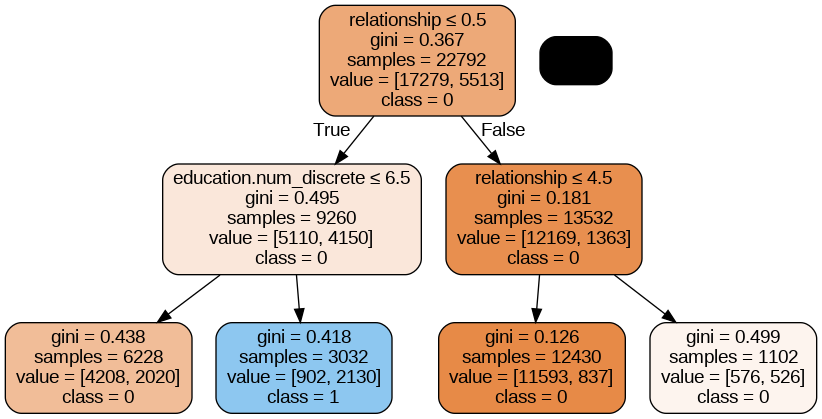

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = labels,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('income.png')
Image(graph.create_png())


